# Cloud Storage Analysis

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf

### Setting our date ranges and the stocks that we wish to track

In [38]:
# input
# Cloud Services Stock
symbols = ['AMZN','MSFT','GOOGL']
start = '2016-01-01'
end = '2019-01-01'

In [39]:
df = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [41]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('%s years of investing' % delta.years)

How many years of investing?
3 years


In [42]:
number_of_years = delta.years

In [43]:
days = (df.index[-1] - df.index[0]).days
days

1096

In [44]:
df.head()

,AMZN,GOOGL,MSFT
Date,,,
2015-12-31,675.890015,778.010010,50.882519
2016-01-04,636.989990,759.440002,50.258858
2016-01-05,633.789978,761.530029,50.488148
2016-01-06,632.650024,759.330017,49.571011
2016-01-07,607.940002,741.000000,47.846802


In [45]:
df.tail()

,AMZN,GOOGL,MSFT
Date,,,
2018-12-24,1343.959961,984.669983,92.248878
2018-12-26,1470.900024,1047.849976,98.550377
2018-12-27,1461.640015,1052.900024,99.158005
2018-12-28,1478.020020,1046.680054,98.383781
2018-12-31,1501.969971,1044.959961,99.540192


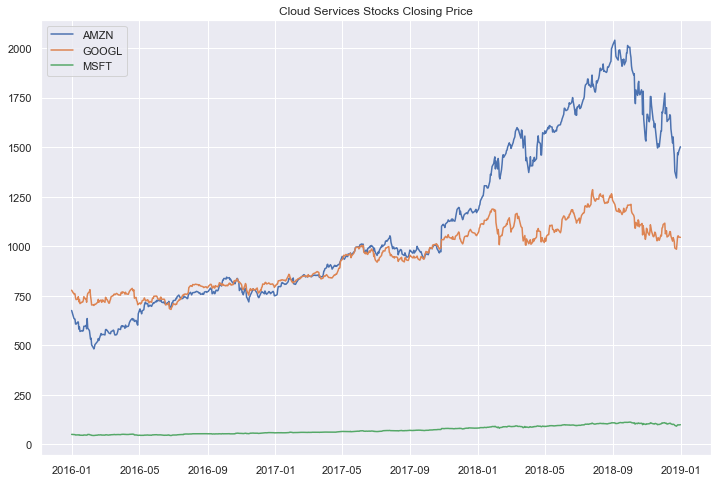

In [46]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Cloud Service Provider Stocks Closing Price')
plt.legend(labels=df.columns)
plt.savefig('closing_price_plot.png')

In [74]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

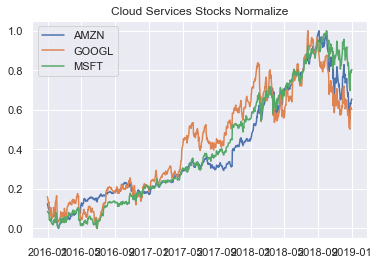

In [76]:
plt.plot(normalize)
plt.title('Cloud Services Stocks Normalize')
plt.legend(labels=normalize.columns)

In [49]:
stock_rets = df.pct_change().dropna()

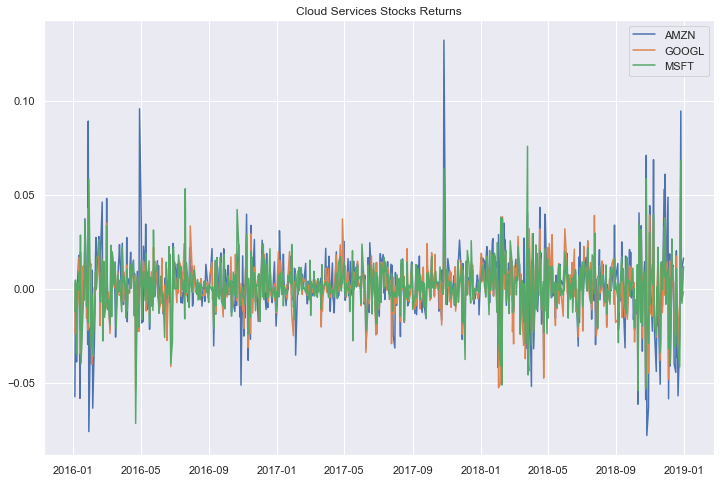

In [50]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Cloud Services Stocks Returns')
plt.legend(labels=stock_rets.columns)

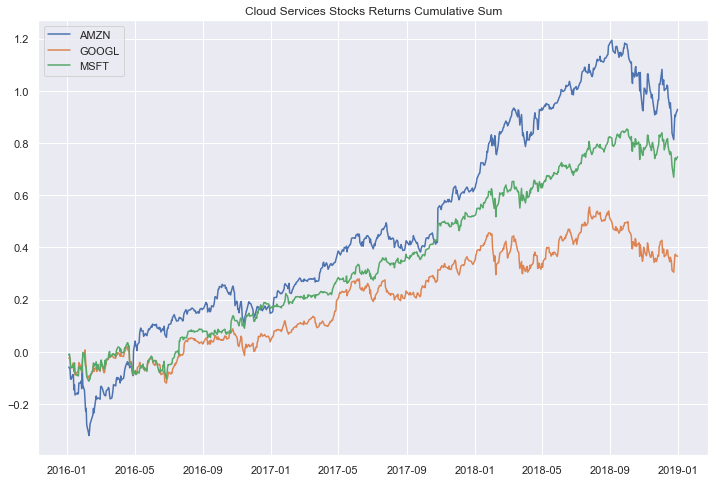

In [51]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Cloud Services Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

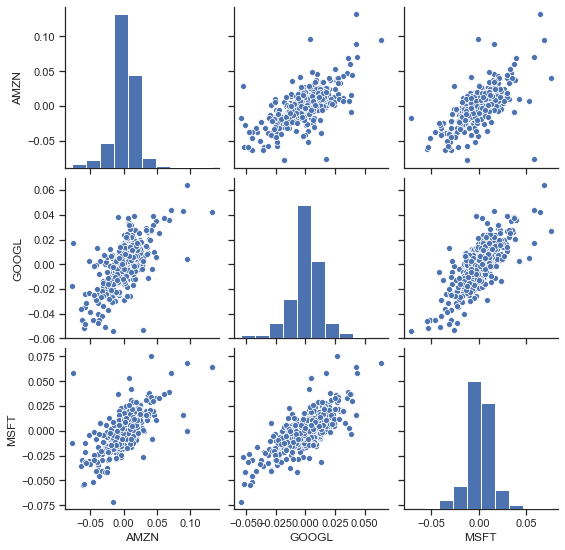

In [52]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

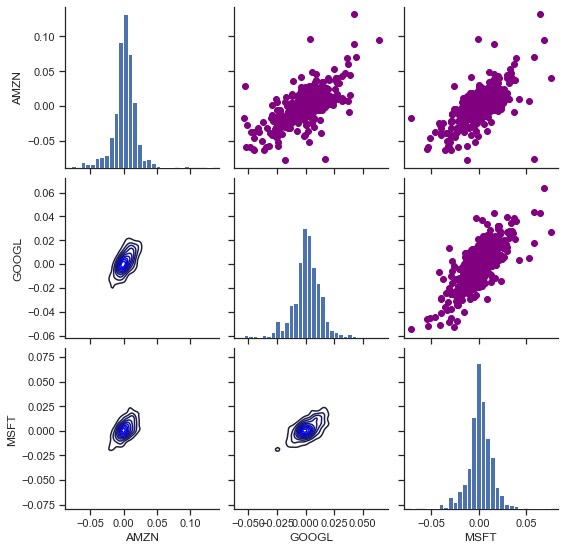

In [53]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

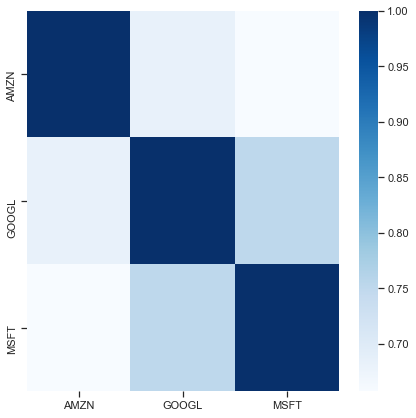

In [54]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

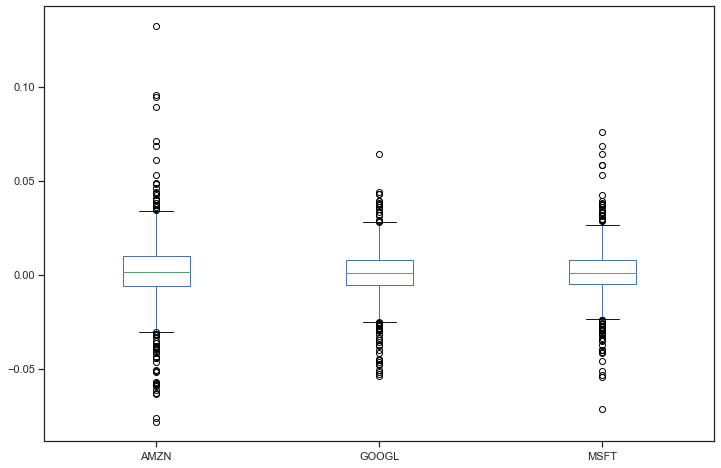

In [55]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

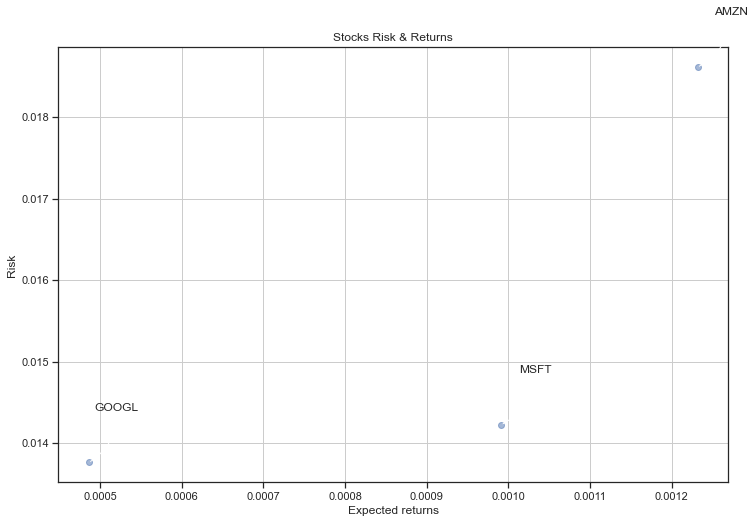

In [56]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

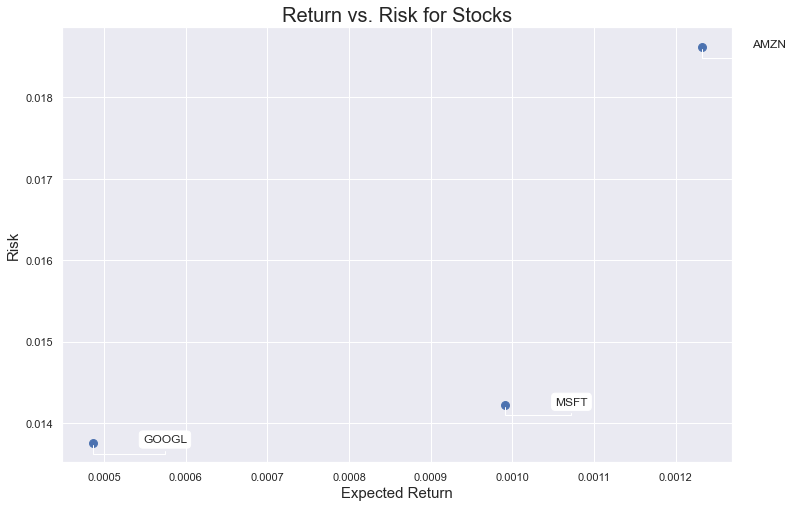

In [57]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [58]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

MSFT   MSFT     1.000000
GOOGL  GOOGL    1.000000
AMZN   AMZN     1.000000
MSFT   GOOGL    0.751269
GOOGL  MSFT     0.751269
       AMZN     0.683486
AMZN   GOOGL    0.683486
MSFT   AMZN     0.657294
AMZN   MSFT     0.657294
dtype: float64

In [59]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AMZN,GOOGL,MSFT
Date,,,
2016-01-04,0.098132,0.255885,0.403305
2016-01-05,0.347846,0.480903,0.517397
2016-01-06,0.363177,0.433221,0.363224
2016-01-07,0.186056,0.253593,0.250500
2016-01-08,0.364768,0.342541,0.507255


In [60]:
Normalized_Value.corr()

,AMZN,GOOGL,MSFT
AMZN,1.000000,0.683486,0.657294
GOOGL,0.683486,1.000000,0.751269
MSFT,0.657294,0.751269,1.000000


In [61]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

MSFT   MSFT     1.000000
GOOGL  GOOGL    1.000000
AMZN   AMZN     1.000000
MSFT   GOOGL    0.751269
GOOGL  MSFT     0.751269
       AMZN     0.683486
AMZN   GOOGL    0.683486
MSFT   AMZN     0.657294
AMZN   MSFT     0.657294
dtype: float64

In [62]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AMZN     0.001232
GOOGL    0.000486
MSFT     0.000991
dtype: float64
--------------------------------------------------
Stock risks:
AMZN     0.018618
GOOGL    0.013760
MSFT     0.014224
dtype: float64


In [63]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
GOOGL,0.000486,0.013760
MSFT,0.000991,0.014224
AMZN,0.001232,0.018618


In [64]:
table.sort_values(by='Risk')

,Returns,Risk
GOOGL,0.000486,0.013760
MSFT,0.000991,0.014224
AMZN,0.001232,0.018618


In [65]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AMZN,0.001232,0.018618,-0.470959
GOOGL,0.000486,0.013760,-0.691382
MSFT,0.000991,0.014224,-0.633342


In [66]:
table['Max Returns'] = rets.max()

In [67]:
table['Min Returns'] = rets.min()

In [68]:
table['Median Returns'] = rets.median()

In [69]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AMZN,0.001232,0.018618,-0.470959,0.132164,-0.078197,0.001433,1.620408
GOOGL,0.000486,0.013760,-0.691382,0.064164,-0.054141,0.000904,-0.164338
MSFT,0.000991,0.014224,-0.633342,0.075705,-0.071710,0.000856,1.175407


In [70]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
AMZN,0.001232,0.018618,-0.470959,0.132164,-0.078197,0.001433,1.620408,0.005372
GOOGL,0.000486,0.013760,-0.691382,0.064164,-0.054141,0.000904,-0.164338,-0.000548
MSFT,0.000991,0.014224,-0.633342,0.075705,-0.071710,0.000856,1.175407,0.003903


In [71]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AMZN,0.001232,0.018618,-0.470959,0.132164,-0.078197,0.001433,1.620408,0.005372,0.201532
GOOGL,0.000486,0.013760,-0.691382,0.064164,-0.054141,0.000904,-0.164338,-0.000548,0.070180
MSFT,0.000991,0.014224,-0.633342,0.075705,-0.071710,0.000856,1.175407,0.003903,0.166830


In [72]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
GOOGL,0.000486,0.013760,-0.691382,0.064164,-0.054141,0.000904,-0.164338,-0.000548,0.070180
MSFT,0.000991,0.014224,-0.633342,0.075705,-0.071710,0.000856,1.175407,0.003903,0.166830
AMZN,0.001232,0.018618,-0.470959,0.132164,-0.078197,0.001433,1.620408,0.005372,0.201532
